Authors:

### This Jupyter Notebook file runs a multilayer perceptron (MLP) algorithm for classification of ___ data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay



In [2]:
df=pd.read_csv('iris_data/iris.data', index_col=False,
               names=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class'])

In [3]:
labels = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2,
}

In [4]:
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])  
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
mlp = MLPClassifier(max_iter=150)

param_grid = {
    'hidden_layer_sizes':[(32,), (64,), (64, 32), (128, 64, 32), (50,), (100,), (100, 50), (100, 50, 25)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


c:\Users\ppxnp3\miniconda3\envs\mlprojectenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=150), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(32,), (64,), (64, 32),
                                                (128, 64, 32), (50,), (100,),
                                                (100, 50), (100, 50, 25)],
                         'solver': ['adam', 'sgd']},
             verbose=2)

In [8]:
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}


In [9]:
best_model= grid_search.best_estimator_
pred = best_model.predict(X_test)

score = accuracy_score(y_test, pred)
print(f'Accuracy: {score:.2f}')

Accuracy: 0.97


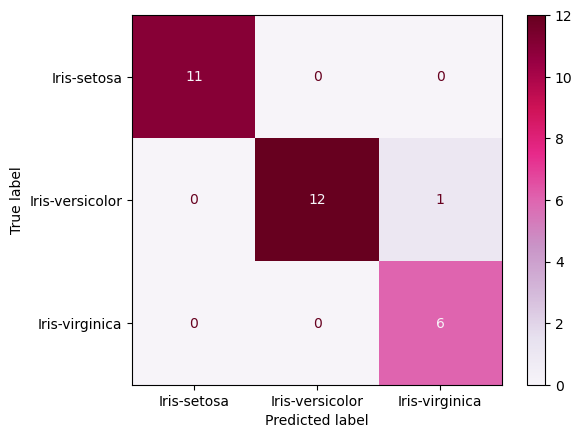

In [9]:
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=pred, cmap='PuRd',
                                        display_labels=list(labels.keys()))

**The model correctly classified all Iris-setosa and Iris-virginica samples, with only one misclassification in Iris-versicolor, achieving an overall accuracy of 97%.**